In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import math

#Importando os Modelos de Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [8]:
# dataset_path = 'D:\Programations\DataScience\employee_prediction\data';
dataset_path = r'C:\Users\diego\Documents\GitHub\employee_prediction\data';
data_file = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
data_path = os.path.join(dataset_path,data_file)

df = pd.read_csv(data_path)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
print("Valores ausentes por coluna")
print(df.isnull().sum())

Valores ausentes por coluna
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurre

Distribuicao da variavel alvo 'Abandono (Attrition)':
Attrition
No     1233
Yes     237
Name: count, dtype: int64


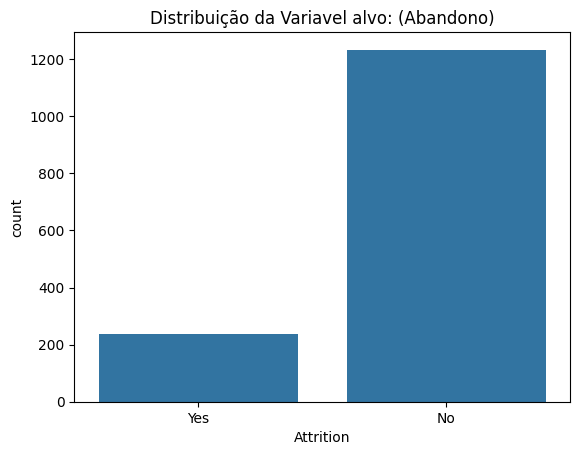

In [10]:
print("Distribuicao da variavel alvo 'Abandono (Attrition)':")
print(df['Attrition'].value_counts())

#Visualizando a ditribuicao
sns.countplot(x='Attrition', data=df)
plt.title('Distribuição da Variavel alvo: (Abandono)')
plt.show()

In [11]:
#retirando as colunas que não tem importãncia
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [11]:
#Conversão da Variavel alvo
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No':0})

#Selecionando apenas as colunas com as categorias 'object'
colunas_categoricas = df.select_dtypes(include=['object']).columns
df_processado = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

print("Colunas após o processamento do encoding:")
print(df_processado.shape)
df_processado.head()

Colunas após o processamento do encoding:
(1470, 48)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,1,2,3,61,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,1,4,4,92,2,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,1,5,4,56,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,7,1,40,3,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
# DistanceFromHome
# EnviromentSatisfaction
# JobSatisfaction
# YearsAtCompany 
# WorkLifeBalance
# PercentSalaryHike
# YearsInCurrentRole
# YearsSinceLastPromotion